# Example of FORWARD

This is an example of how to use FORWARD algorithm step by step.

First, intiallize the environment with all the needed packages and build functions.

In [1]:
include("../main/PreProcessor.jl")
include("../main/Islander.jl")
include("../main/NetConcad.jl")
include("../main/Sampler.jl")
include("../main/Auxiliary.jl")
using .PreProcessor
using .Islander
using .NetConcad
using .Sampler
using .Auxiliary
using Graphs
using MetaGraphs
using GraphPlot
using KNITRO
using Plots
using JuMP
using Ipopt
using Combinatorics

Second step is to create a Distribution Network to reconfigurate.

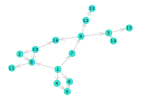

In [2]:
# Create an empty directed graph
G = MetaDiGraph(16)
# Add properties to the nodes
set_prop!(G,1,:p,10);  set_prop!(G,1,:id,1);   set_prop!(G,1,:h,0)
set_prop!(G,2,:p,22);  set_prop!(G,2,:id,2);   set_prop!(G,2,:h,0)
set_prop!(G,3,:p,22);  set_prop!(G,3,:id,3);   set_prop!(G,3,:h,0)
set_prop!(G,4,:p,-1);  set_prop!(G,4,:id,4);   set_prop!(G,4,:h,0)
set_prop!(G,5,:p,-4);  set_prop!(G,5,:id,5);   set_prop!(G,5,:h,0)
set_prop!(G,6,:p,-1);  set_prop!(G,6,:id,6);   set_prop!(G,6,:h,0)
set_prop!(G,7,:p,0);   set_prop!(G,7,:id,7);   set_prop!(G,7,:h,0)
set_prop!(G,8,:p,-2);  set_prop!(G,8,:id,8);   set_prop!(G,8,:h,0)
set_prop!(G,9,:p,-3);  set_prop!(G,9,:id,9);   set_prop!(G,9,:h,0)
set_prop!(G,10,:p,-1); set_prop!(G,10,:id,10); set_prop!(G,10,:h,0)
set_prop!(G,11,:p,-3); set_prop!(G,11,:id,11); set_prop!(G,11,:h,0)
set_prop!(G,12,:p,-2); set_prop!(G,12,:id,12); set_prop!(G,12,:h,0)
set_prop!(G,13,:p,-1); set_prop!(G,13,:id,13); set_prop!(G,13,:h,0)
set_prop!(G,14,:p,-4); set_prop!(G,14,:id,14); set_prop!(G,14,:h,0)
set_prop!(G,15,:p,-3); set_prop!(G,15,:id,15); set_prop!(G,15,:h,0)
set_prop!(G,16,:p,-3); set_prop!(G,16,:id,16); set_prop!(G,16,:h,0)
# Add directed edges
add_edge!(G, 1, 4);   set_prop!(G,Edge(1,4),:w,5)
add_edge!(G, 4, 5);   set_prop!(G,Edge(4,5),:w,5)
add_edge!(G, 5, 6);   set_prop!(G,Edge(5,6),:w,5)
add_edge!(G, 1, 6);   set_prop!(G,Edge(1,6),:w,5)
add_edge!(G, 1, 8);   set_prop!(G,Edge(1,8),:w,5)
add_edge!(G, 8, 11);  set_prop!(G,Edge(8,11),:w,5)
add_edge!(G, 2, 8);   set_prop!(G,Edge(2,8),:w,5)
add_edge!(G, 10, 2);  set_prop!(G,Edge(10,2),:w,5)
add_edge!(G, 10, 8);  set_prop!(G,Edge(10,8),:w,5)
add_edge!(G, 10, 16); set_prop!(G,Edge(10,16),:w,5)
add_edge!(G, 9, 16);  set_prop!(G,Edge(9,16),:w,5)
add_edge!(G, 7, 9);   set_prop!(G,Edge(7,9),:w,5)
add_edge!(G, 1, 7);   set_prop!(G,Edge(1,7),:w,5)
add_edge!(G, 9, 12);  set_prop!(G,Edge(9,12),:w,5)
add_edge!(G, 12, 13); set_prop!(G,Edge(12,13),:w,5)
add_edge!(G, 9, 3);   set_prop!(G,Edge(9,3),:w,5)
add_edge!(G, 3, 14);  set_prop!(G,Edge(3,14),:w,5)
add_edge!(G, 3, 15);  set_prop!(G,Edge(3,15),:w,5)

# Plot the graph
id_list = [get_prop(G, i, :id) for i in 1:nv(G)]
gplot(G, nodelabel=id_list)

Then, let us apply **Preprocessor** to remove pendant nodes.

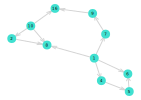

In [3]:
G_p,S_p = PreProcessor.preprocessor(G)
# Plot pre-processed G
id_list = [get_prop(G_p, i, :id) for i in 1:nv(G_p)]
gplot(G_p, nodelabel=id_list)

Information from nodes can be plot by Auxiliary module.

In [4]:
Auxiliary.show_node(G_p,:p)

Node 1 has p: 10
Node 2 has p: 22
Node 16 has p: -3
Node 4 has p: -1
Node 5 has p: -4
Node 6 has p: -1
Node 7 has p: 0
Node 8 has p: -5
Node 9 has p: 9
Node 10 has p: -1


Run **Islander** to partition the graph into bi-connected sub-graphs. Use *outlev* to define the level of logging: 0 - no display; 1 - small display; 2 - further display

In [5]:
outlev = 2
V_g = [get_prop(G_p,i,:id) for i in vertices(G_p) if get_prop(G_p,i,:p)>0]
subgraphs = Islander.islander(G_p,V_g,Ipopt.Optimizer, outlev)






















******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:       12
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total num

2-element Vector{Any}:
 {7, 8} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {4, 4} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

Subgraphs can be visualized below

In 1 - 10 -> -1
In 2 - 2 -> 9.192895669442343
In 3 - 16 -> -3
In 4 - 7 -> 0
In 5 - 8 -> -5
In 6 - 9 -> 2.706426957784884
In 7 - 1 -> -2.899322626863512


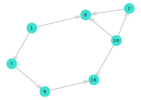

In [6]:
id = 1
for i in 1:nv(subgraphs[id])
    a = get_prop(subgraphs[id], i, :id)
    p = get_prop(subgraphs[id], i, :p)
    println("In ",i," - ",a," -> ",p)
end
id_list = [get_prop(subgraphs[id], i, :id) for i in 1:nv(subgraphs[id])]
gplot(subgraphs[id], nodelabel=id_list)

We can turn our graph into a bidirected graph with Auxiliary module.

In [7]:
for i=1:length(subgraphs)
    Auxiliary.make_bidirected!(subgraphs[i])
end

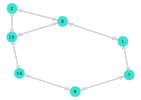

In [8]:
id = 1
id_list = [get_prop(subgraphs[id], i, :id) for i in 1:nv(subgraphs[id])]
gplot(subgraphs[id], nodelabel=id_list)

Run **NetConcad** function to condense the graph into super nodes.

In [9]:
G_cond_list = []
for i=1:length(subgraphs)
    G_cond_i = NetConcad.netconcad(subgraphs[i],V_g)
    push!(G_cond_list, G_cond_i) 
end

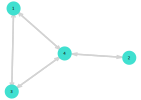

In [10]:
id = 1
gplot(G_cond_list[id], nodelabel=1:nv(G_cond_list[id]))

Run **Sampler** to sample a spanning polyforest.

In [11]:
strategy = "greedy_max"
S = []; termination_status_list = []; f_S = []
for id=1:length(subgraphs)
    S_i = MetaDiGraph(nv(subgraphs[id]))
    [set_prop!(S_i,i,:id,get_prop(subgraphs[id],i,:id)) for i in vertices(S_i)]
    S_i,termination_status_i, f_S_i = Sampler.sampler(subgraphs[id],G_cond_list[id],S_i,strategy, outlev)
    push!(S, S_i) 
    push!(termination_status_list, termination_status_i)
    push!(f_S, f_S_i)
end

The sampled edge sampled is 2 - 10 with weight 0.25
The sampled edge sampled is 10 - 16 with weight 0.20588235294117646
The sampled edge sampled is 10 - 8 with weight 0.3442622950819672
The sampled edge sampled is 8 - 1 with weight 0.5280464216634428
The sampled edge sampled is 9 - 16 with weight 0.5
FORWARD stopped in a feasible solution
Node 10 has p: 3.637152801161392e-10
Node 2 has p: 3.637152801161392e-10
Node 16 has p: 3.637152801161392e-10
Node 7 has p: 0
Node 8 has p: 3.637152801161392e-10
Node 9 has p: 3.637152801161392e-10
Node 1 has p: 3.637152801161392e-10
The sampled edge sampled is 1 - 4 with weight 0.5
The sampled edge sampled is 4 - 5 with weight 0.5238095238095237
The sampled edge sampled is 5 - 6 with weight 0.5464362850971922


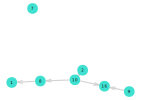

In [12]:
# Plot results
id = 1
id_list = [get_prop(S[id], i, :id) for i in 1:nv(S[id])]
gplot(S[id], nodelabel=id_list)

Let us join all the sub-graphs.

The cost is 3.3984368785933023


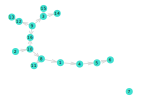

In [13]:
push!(S, S_p)
T = Auxiliary.join_subsets(G,S)
println("The cost is ",sum(f_S))
id_list = [get_prop(G, i, :id) for i in 1:nv(G)]
gplot(T, nodelabel=id_list)